In [2]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, f1_score, confusion_matrix
from sklearn.preprocessing import scale
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score

data = pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


(array([[768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 72., 625.,  71.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [656., 112.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [767.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [487., 155.,  70.,  30.,   8.,   9.,   5.,   1.,   2.,   1.],
        [768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([  0. ,  84.6, 169.2, 253.8, 338.4, 423. , 507.6, 592.2, 676.8,
        761.4, 846. ]),
 <a list of 8 BarContainer objects>)

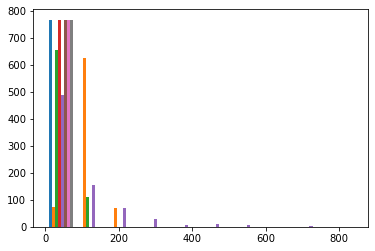

In [3]:
#assigning features to x and target to y
X = data.drop(["Outcome"], axis=1) 
y = data['Outcome']

plt.hist(X)

(array([[  0.,   0., 111., 381., 190.,  63.,  22.,   1.,   0.,   0.],
        [  5.,   4., 131., 356., 180.,  86.,   6.,   0.,   0.,   0.],
        [ 35.,   3.,  37., 344., 325.,  23.,   1.,   0.,   0.,   0.],
        [  0.,   0., 229., 182., 298.,  56.,   2.,   0.,   1.,   0.],
        [  0.,   0.,   0., 536., 165.,  42.,  10.,  11.,   2.,   2.],
        [ 11.,   0., 123., 329., 234.,  63.,   6.,   2.,   0.,   0.],
        [  0.,   0., 114., 410., 172.,  48.,  15.,   5.,   2.,   2.],
        [  0.,   0., 173., 325., 176.,  69.,  24.,   1.,   0.,   0.]]),
 array([-4.05782947, -2.98719586, -1.91656224, -0.84592862,  0.22470499,
         1.29533861,  2.36597223,  3.43660584,  4.50723946,  5.57787308,
         6.64850669]),
 <a list of 8 BarContainer objects>)

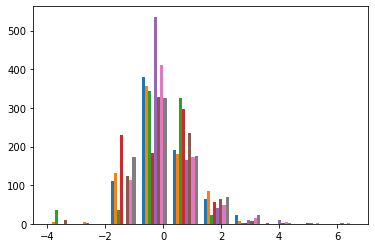

In [4]:
# Normalize
for column in X:
    X[column] = (X[column] - X[column].mean()) / (X[column].std())

X

plt.hist(X)

<AxesSubplot:>

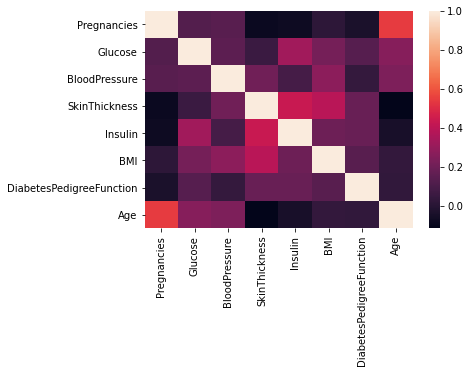

In [5]:
# Covariance Matrix
sns.heatmap(X.corr( ), annot=False)

In [6]:
from sklearn.model_selection import train_test_split 

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [7]:
from sklearn.linear_model import SGDClassifier

# Build a Tree Classifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000)

# Model training
clf = clf.fit(x_train, y_train)

# Predict Output
predicted = clf.predict(x_test)

In [8]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
auc = roc_auc_score(y_test, y_pred, multi_class='ovo')
print(f"AUC score: {auc:.3f}")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

AUC score: 0.747
Accuracy: 0.7792207792207793
F1 Score: 0.7823426573426572


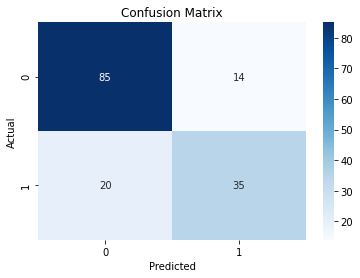

In [9]:
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

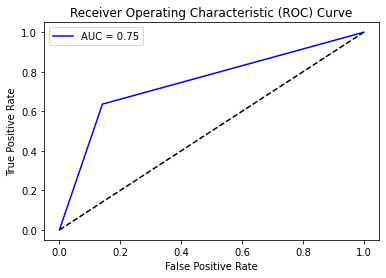

In [10]:
# Plot the ROC curve
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()